# **OCCUPANCY DETECTION BY DEPLOYMENT OF VARIOUS SENSORS**

In this project we are going to classify occupancy status. We are using sensor data of a corporate office. There are three datasets. One for training and two for testing.

# **Importing Required Python Libraries**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt  
import plotly.express as px 
import plotly.graph_objects as go

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout 
from keras.regularizers import l2, l1 
from keras.metrics import BinaryAccuracy

**Three Datasets which are used are loaded below:**

1.Testing

2.Training

3.Validation   

**The Validation dataset was collected in
an open door situation and the testing dataset was gathered in a closed-door
situation.**

The Validation Dataset is named as "test2".

## **Loading the data using pandas dataframe**

In [ ]:
#uploading the dataset
from google.colab import files
data = files.upload()

Saving datatest.txt to datatest (1).txt
Saving datatest2.txt to datatest2 (1).txt
Saving datatraining.txt to datatraining (1).txt


In [ ]:
train = pd.read_csv("datatraining.txt") 
test1 = pd.read_csv("datatest.txt") 
test2 = pd.read_csv("datatest2.txt")

**Looking at first five rows of "Training", "Testing", and "Validation" datasets to understand a bit about the data we are using.**

In [ ]:
print('Training Set')
print(train.head())
print()
print('Test Set 1')
print(test1.head())
print()
print('Test Set 2')
print(test2.head())

Training Set
                  date  Temperature  Humidity  ...     CO2  HumidityRatio  Occupancy
1  2015-02-04 17:51:00        23.18   27.2720  ...  721.25       0.004793          1
2  2015-02-04 17:51:59        23.15   27.2675  ...  714.00       0.004783          1
3  2015-02-04 17:53:00        23.15   27.2450  ...  713.50       0.004779          1
4  2015-02-04 17:54:00        23.15   27.2000  ...  708.25       0.004772          1
5  2015-02-04 17:55:00        23.10   27.2000  ...  704.50       0.004757          1

[5 rows x 7 columns]

Test Set 1
                    date  Temperature  ...  HumidityRatio  Occupancy
140  2015-02-02 14:19:00      23.7000  ...       0.004764          1
141  2015-02-02 14:19:59      23.7180  ...       0.004773          1
142  2015-02-02 14:21:00      23.7300  ...       0.004765          1
143  2015-02-02 14:22:00      23.7225  ...       0.004744          1
144  2015-02-02 14:23:00      23.7540  ...       0.004767          1

[5 rows x 7 columns]

Test S

**To get a rough idea about the datasets as in if there are any null values and the type of data being used.**

**Information regarding Testing dataset**

In [ ]:
print(test1.info()) 
test1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


**Information regarding Validation dataset.**

In [ ]:
print(test2.info()) 
test2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


**Information regarding Training Dataset.**

In [ ]:
print(train.info()) 
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


**After having looked upon the basic information regarding Training, Testing, and Validation datasets we made few inferences:**

**All three datasets consists of seven features namely, "date", "Temperature", "Humidity", "Light", "CO2", "HumidityRatio", and "Occupancy".**

**Each of the features of Testing Dataset comprises of 2665  values.**

**Each of the features of Validation Dataset comprises of 9752  values.**

**Each of the features of Training Dataset comprises of 8143  values.**









**Printing the size of Datasets being used.**

In [ ]:
print(train.shape)
print(test1.shape)
print(test2.shape)

(8143, 7)
(2665, 7)
(9752, 7)


**As expected there should have been 6 columns corresponding to the 6 features as we saw earlier but after looking at the shape and information of the datasets we observed that there is an extra 
column named ‘column 1’ which mismatches with the ‘date’
column. We need to delete it so that it does not cause problem 
later.**

##**Statistical Analysis**

**Statistical Analysis of the Datasets are done in order to get an idea about the mean , median, count, minimum, and maximum values of the data of each dataset.**

In [ ]:
#some analytical attributes of train set
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [ ]:
#some analytical attributes of test set 1
test1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [ ]:
#some analytical attributes of test set 2
test2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


**As mentioned earlier, The data set has an unnamed id column which mismatches with date. So,we deleted it for making header and the data fitting each other. Also, the second test set seems to lack quotation marks around the dates, so that has been added.**

In [ ]:
# For training data set:
lines = []
with open('datatraining.txt', 'r') as f:
    lines = f.readlines()
    
new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('train.csv', 'w') as f:
    f.writelines(new_lines)
    
# For test1 data set:
lines = []
with open('datatest.txt', 'r') as f:
    lines = f.readlines()
    new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('test1.csv', 'w') as f:
    f.writelines(new_lines)
    
# For test2 data set:
lines = []
with open('datatest2.txt', 'r') as f:
    lines = f.readlines()
    
new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    i = line.index(',') + 1
    ii = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+ii] + '"' + line[i+ii:]
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('test2.csv', 'w') as f:
    f.writelines(new_lines)

**Now very importantly check if there are any null values 
present because if there is any NaN value present then it will have to be replaced with some significant values.**

In [ ]:
# Check NaNs for train:
print(train.isnull().sum())
print()
# Check NaNs for test1:
print(test1.isnull().sum())
print()
# Check NaNs for test2:
print()
print(test2.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


**From the above result we got to know that there are no NaN values present.**

# **Data Visualization**

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

Plotting the scatter matrix with respect to occupancy column:

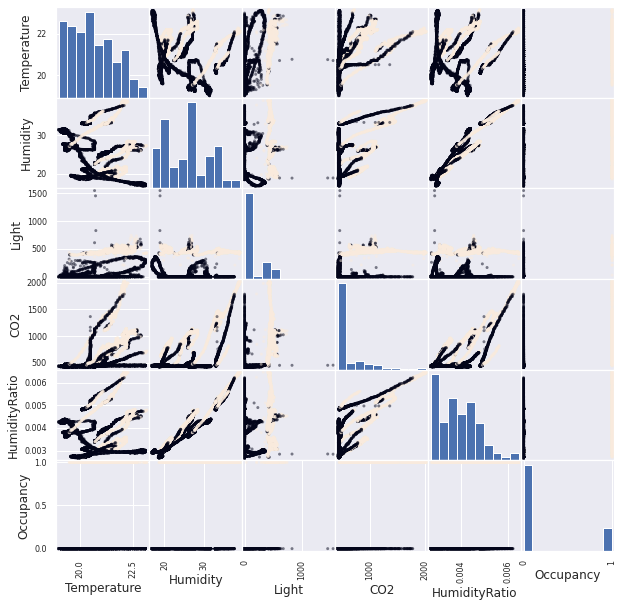

In [ ]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[10, 10])
plt.show()

From here we can see that Humidity ratio and humidity are highly correlated, so humidity ratio can be dropped.

 **Time Series Analysis**

To see time series of every feature. we converted date strings to Python datetime objects.

In [ ]:
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

**Converting Date for each Dataset**

In [ ]:
def convert_dates(df):
    for i, date in enumerate(df['date']):
        df.iloc[i, df.columns.get_loc('date')] = dateOrNotToDate(date)
convert_dates(train)
convert_dates(test1)
convert_dates(test2)

**ggplot —a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers.**

Plotting every feature in time series:

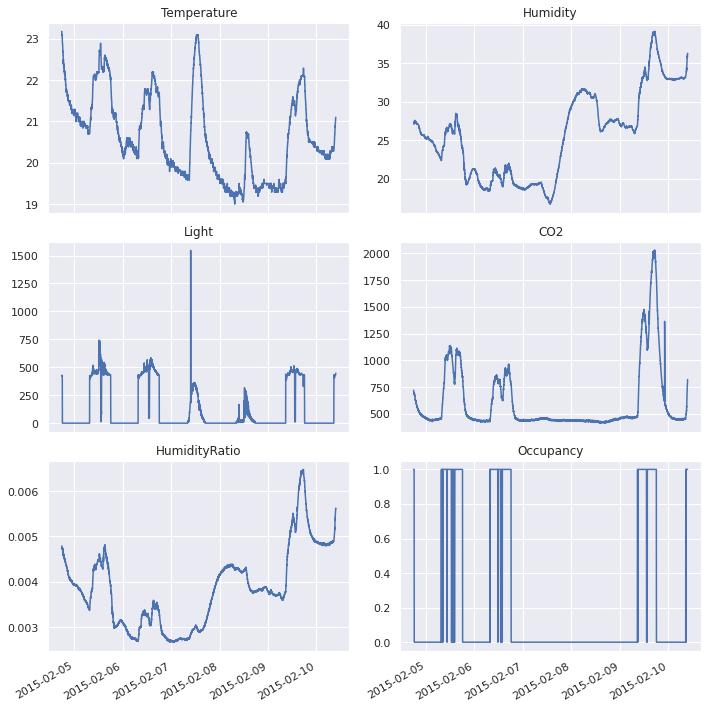

In [ ]:
#plt.style.use('ggplot')
for i, col in enumerate(train.columns.values[1:]):
    plt.subplot(3, 2, i+1)
    plt.plot(train['date'].values.tolist(), train[col].values.tolist(), label=col)
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.grid(True)
plt.show()

**Normalizing the data:** Since we have low values like humidity_ratio and high values like light and CO2, we should normalize the data to simplify the learning process.


In [ ]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(train[columns]))
test1[columns] = scaler.transform(np.array(test1[columns]))
test2[columns] = scaler.transform(np.array(test2[columns]))
train[columns] = scaler.transform(np.array(train[columns])
)

# **Box Plot of the features**

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


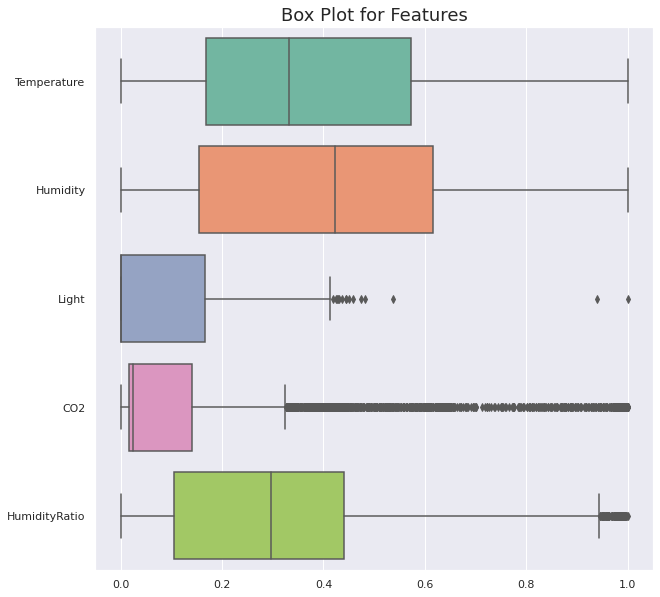

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=train.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(train.drop(['date', 'Occupancy'],axis=1).describe())

# **Correlation table for the features**

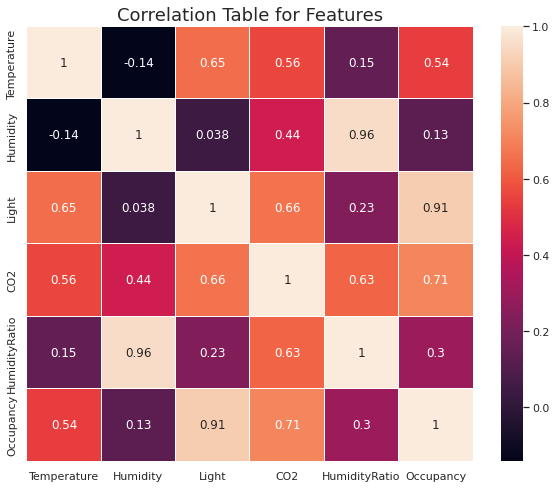

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train.corr(), annot=True, linewidths=.2)

# **4-D plot for occupancy**

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [ ]:
data = train.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
'y':0.9,
'x':0.5,
'xanchor': 'center',
'yanchor': 'top'})
iplot(fig)

Occupancy status: 1 indicates "occupied" status, 0 indicated "unoccupied" status

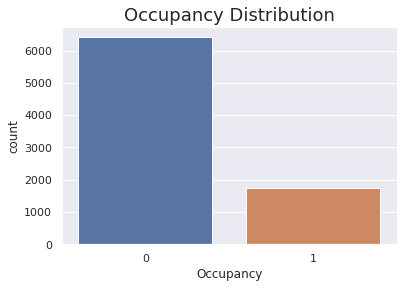

In [ ]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=train)

There's a wide gap between 07-09.02.2015, so checking for the day of those dates

In [ ]:
days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
seventh_of_feb = datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_of_feb.weekday()])

Saturday


So, its saturday-Weekend! So the employees don't go to the office on weekends.

If we can get the start indices of every day in the dates, we can iterate through days and for every day we can plot occupancy in time series.

To do so, we stored the Date column in a list, and day start indices in another. Iterating through 5 to 10, we will get those dates' start index in the dataset:

In [ ]:
date_list = train.date.values.tolist()
day_start_indices = []
for i in range(5, 11):
    day_start_indices.append(
        date_list.index(
            datetime.strptime(
                '2015-02-' + str(i) + ' 00:00:00',
                '%Y-%m-%d %H:%M:%S'
            )
        )
    )
day_start_indices = [0] + day_start_indices
print(day_start_indices)

[0, 369, 1809, 3249, 4689, 6129, 7569]


So, first 369 rows are from 4th of Feb. Subsequent rows, from 370 to 1808 are from 5th of Feb. etc.

Now, we plot the occupancy in time series:

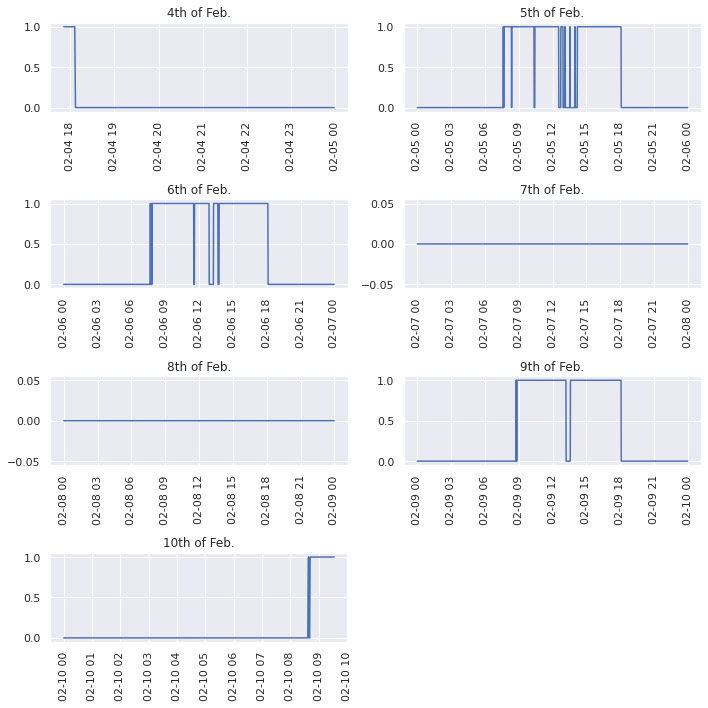

In [ ]:
for i in range(len(day_start_indices)):    
    plt.subplot(4, 2, i + 1)
    if i != len(day_start_indices) - 1:
        plt.plot(
            date_list[day_start_indices[i]:day_start_indices[i+1]],
            train['Occupancy'].values.tolist()[
                day_start_indices[i]:day_start_indices[i+1]])
    else:
        plt.plot(
            date_list[day_start_indices[i]:],
            train['Occupancy'].values.tolist()[day_start_indices[i]:])
    plt.title(str(i + 4) + 'th of Feb.')
    plt.grid(True)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.set_size_inches(10, 10)
    fig.tight_layout()
plt.show()

Printing every first and last occurence of occupancy in every days, To get an idea of the working hours for these officers:

In [ ]:
print('Daily Work Hours')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print()
for i in range(len(day_start_indices)-1):
    try:
        print('Start:\t', 
              train.loc[(train.date > date_list[day_start_indices[i]]) &
                        (train.date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'date'].iloc[0])
        print('End:\t',
              train.loc[(train.date > date_list[day_start_indices[i]]) &
                        (train.date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'date'].iloc[-1])
    except:
        print('No Occupancy')
    print('########################################')
    print()

Daily Work Hours
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Start:	 2015-02-04 17:51:59
End:	 2015-02-04 18:06:00
########################################

Start:	 2015-02-05 07:38:00
End:	 2015-02-05 18:04:00
########################################

Start:	 2015-02-06 07:40:59
End:	 2015-02-06 18:06:00
########################################

No Occupancy
########################################

No Occupancy
########################################

Start:	 2015-02-09 08:44:59
End:	 2015-02-09 18:04:00
########################################



It appears to be that, employees do not come to office before 07:30 and they depart after 18:00.

 **Analysing Light:** Light seems to be less than 400lx at the weekend. Day light must be illuminating the room atmost 370lx or so. Light follows the same pattern with occupancy. Interesting enough, there is a sudden increase in the lighting at the weekend, possibly on 7th of Feb. Those spots may be outliers.

In [ ]:
lighting = train.loc[
    (train.date > date_list[day_start_indices[3]]) &
    (train.date < date_list[day_start_indices[4]]) &
    (train.Light > 850),
    ('date', 'Light')
]
print(lighting)


Empty DataFrame
Columns: [date, Light]
Index: []


After exploratory analyses, we decided to add Weekend and WorkingHours as features. To do this, we  will, again, write a function to apply the addition to all three of the data sets. For Weekend, as might be expected, we will check if the date is "Saturday or Sunday" or not. If so, then Weekend = 1, else Weekend = 0.

For WorkingHours, if time of the day is between 07:30 and 18:00, then WorkingHours = 1, else WorkingHours = 0.

Firstly we will fill these new columns with 0s. Those which fit the condition will later take their corresponding values.


In [ ]:

def add_features(df):
    df.loc[:, 'Weekend'] = 0
    df.loc[:, 'WorkingHour'] = 0

    for i, date in enumerate(df['date']):
        if (days[date.weekday()] == 'Saturday') or\
            (days[date.weekday()] == 'Sunday'):
            df.iloc[i, df.columns.get_loc('Weekend')] = 1

        if date.time() >= datetime.strptime('07:30', '%H:%M').time() and\
            date.time() <= datetime.strptime('18:00', '%H:%M').time():
            df.iloc[i, df.columns.get_loc('WorkingHour')] = 1

add_features(train)
add_features(test1)
add_features(test2)

 Plotting the scatter matrix again, after the addition of these two new features

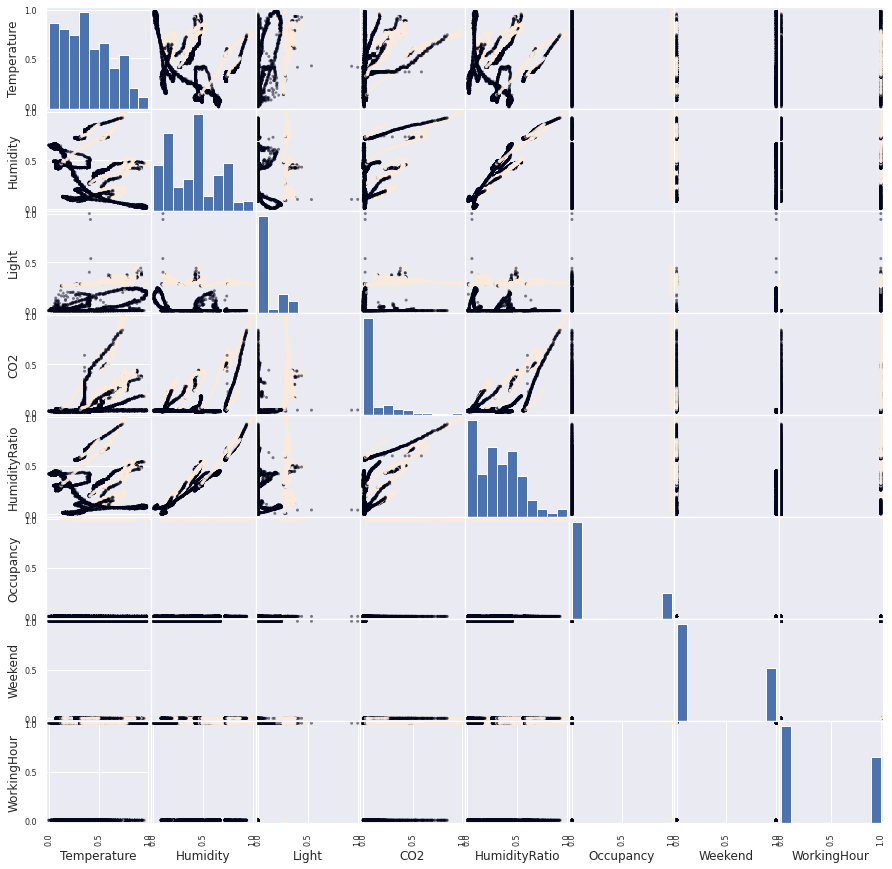

In [ ]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[15, 15])
plt.show()

As the results show, Weekend clearly distinguishes the occupancy. So does the WorkingHour.

Also Weekend and Light together seems to be seperable while Weekend with Humidity seems less helpful. Likewise, WorkingHour with CO2 seems very neat and separable.

# **Modeling, Training and Testing**
After data analyses, now, we shall extract source and target domains for modeling.

X_train includes all columns except Occupancy of train DataFrame. X_test1 includes all columns except Occupancy of test1 DataFrame. Xtest2 includes all columns except Occupancy of test2 DataFrame. And y* variables are the corresponding target Series.

We have also defined a list of tuples for features. We will use them in testing the models with different feature combinations.

The Models that we are going to use:



* Linear Regression
*   Logistic Regression
* Kernelized Support Vector Machine
* Decision Tree
* Random Forest
*   Naïve Bayes
* K-Nearest Neighbors


The general convention we followed for every model is,

Import necessary modules.

Define hyper parameters space.

For every feature combinations in the list mentioned above (and coded below):

Make grid search cross-validation.

Fit the model and predict against train, test1, and test2 sets.

Print classification report.

After every model, we presented classification as a table and my conclusions.

In [ ]:
X_train = train.drop('Occupancy', axis=1)
X_train1 = X_train.drop('date', axis=1)
y_train = train['Occupancy']

X_test1 = test1.drop('Occupancy', axis=1)
X_test11 = X_test1.drop('date', axis=1)
y_test1 = test1['Occupancy']

X_test2 = test2.drop('Occupancy', axis=1)
X_test21 = X_test2.drop('date', axis=1)
y_test2 = test2['Occupancy']

features_combs_list = [
    ('Weekend', 'WorkingHour'),
    ('Light', 'CO2'),
    ('WorkingHour', 'CO2'),
    ('CO2', 'Temperature'),
    ('Weekend', 'WorkingHour', 'Light', 'CO2'),
    ('Weekend', 'HumidityRatio'),
]

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train1,y_train)
prediction = linear_regressor.predict(X_test21)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

 #The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test2, prediction))
 # the coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination: %.2f'
       % r2_score(y_test2, prediction))

Mean squared error: 0.02

Coefficient of determination: 0.86


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

hyper_params_space = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 1.2, 1.5],
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]
    
    logit = GridSearchCV(LogisticRegression(), hyper_params_space,
                        scoring='accuracy')
    logit.fit(X, y_train)

    print('Best parameters set:')
    print(logit.best_params_)
    print()
    
    preds = [
        (logit.predict(X), y_train, 'Train'),
        (logit.predict(X_t1), y_test1, 'Test1'),
        (logit.predict(X_t2), y_test2, 'Test2')
    ]
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.99     

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best parameters set:
{'C': 1.5, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      0.99      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.98      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6328   86]
 [  13 1716]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test1 Confusion Matrix:
[[1638   55]
 [   7  965]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6414
           1       0.91      0.85      0.88      1729

    accuracy                           0.95      8143
   macro avg       0.93      0.92      0.92      8143
weighted avg       0.95      0.95      0.95      8143


Train Confusion Matrix:
[[6264  150]
 [ 251 1478]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1693
           1       0.93      0.88      0.90       972

    accuracy                           0.93      2665
   macro avg       0.93      0.92      0.93      2665
weighted avg       0.93      0.93      0.93      2665


Test1 Confusion Matrix:
[[1625   68]
 [ 115  857]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.92     

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best parameters set:
{'C': 1.5, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6414
           1       0.82      0.71      0.76      1729

    accuracy                           0.91      8143
   macro avg       0.87      0.84      0.85      8143
weighted avg       0.90      0.91      0.90      8143


Train Confusion Matrix:
[[6147  267]
 [ 498 1231]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1693
           1       0.83      0.81      0.82       972

    accuracy                           0.87      2665
   macro avg       0.86      0.86      0.86      2665
weighted avg       0.87      0.87      0.87      2665


Test1 Confusion Matrix:
[[1537  156]
 [ 185  787]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.92   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best parameters set:
{'C': 1.5, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      0.99      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.97      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6325   89]
 [  18 1711]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.93      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.97      0.96      0.96      2665


Test1 Confusion Matrix:
[[1616   77]
 [  17  955]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

# **Kernalized Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

hyper_params_space = [
    {
        'kernel': ['linear'],
        'random_state': [0]
    },
    {
        'kernel': ['rbf'],
        'gamma': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    svc = GridSearchCV(SVC(), hyper_params_space,
                       scoring='accuracy')
    svc.fit(X, y_train)
    
    print('Best parameters set:')
    print(svc.best_params_)
    print()
    
    preds = [
        (svc.predict(X), y_train, 'Train'),
        (svc.predict(X_t1), y_test1, 'Test1'),
        (svc.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'kernel': 'linear', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(DecisionTreeClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-sco

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0],
        'n_estimators': np.arange(10, 20)
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(RandomForestClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precisi

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]
    
    nb = GaussianNB()
    nb.fit(X, y_train)
    
    preds = [
        (nb.predict(X), y_train, 'Train'),
        (nb.predict(X_t1), y_test1, 'Test1'),
        (nb.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2], ':', end=' ')
        print(str((X.shape[0] - (pred[0] != pred[1]).sum()) / X.shape[0]))
    print()
    

('Weekend', 'WorkingHour')
Train : 0.9584919562814688
Test1 : 0.9868598796512342
Test2 : 0.8951246469360187

('Light', 'CO2')
Train : 0.9835441483482746
Test1 : 0.9925089033525728
Test2 : 0.9882107331450325

('WorkingHour', 'CO2')
Train : 0.9694215890949281
Test1 : 0.9847721969790003
Test2 : 0.8263539236153752

('CO2', 'Temperature')
Train : 0.9183347660567358
Test1 : 0.955790249293872
Test2 : 0.7671619796143927

('Weekend', 'WorkingHour', 'Light', 'CO2')
Train : 0.9871054893773793
Test1 : 0.9905440255434115
Test2 : 0.9711408571779443

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579



# **K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

hyper_params_space = [
    {
        'n_neighbors': np.arange(1, 50),
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    knn = GridSearchCV(KNeighborsClassifier(), hyper_params_space,
                       scoring='accuracy')
    knn.fit(X, y_train)
    
    print('Best parameters set:')
    print(knn.best_params_)
    print()
    
    preds = [
        (knn.predict(X), y_train, 'Train'),
        (knn.predict(X_t1), y_test1, 'Test1'),
        (knn.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'n_neighbors': 1}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6414
           1       0.00      0.00      0.00      1729

    accuracy                           0.79      8143
   macro avg       0.39      0.50      0.44      8143
weighted avg       0.62      0.79      0.69      8143


Train Confusion Matrix:
[[6414    0]
 [1729    0]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       0.00      0.00      0.00       972

    accuracy                           0.64      2665
   macro avg       0.32      0.50      0.39      2665
weighted avg       0.40      0.64      0.49      2665


Test1 Confusion Matrix:
[[1693    0]
 [ 972    0]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.79    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

Best parameters set:
{'n_neighbors': 45}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      1.00      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.97      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6324   90]
 [   5 1724]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test1 Confusion Matrix:
[[1637   56]
 [   2  970]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7703

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn import metrics

In [ ]:
def Regression(model,X_train,y_train,X_test1,y_test1):
 model.fit(X_train,y_train)
 prediction = model.predict(X_test1)
 print(model.fit(X_train,y_train))
 A=[]
 A.append(metrics.mean_absolute_error(y_test1,prediction))
 A.append(metrics.mean_squared_error(y_test1,prediction))
 A.append(np.sqrt(metrics.mean_squared_error(y_test1,prediction)))
 A.append(model.score(X_train,y_train))
 return A

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train1)
print(X_pca.shape)
X_t_pca = pca.transform(X_test11)
print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
PCR_result = []
PCR_result.append(Regression(LinearRegression(), X_pca, y_train, X_t_pca, y_test1))
PCR_result.append(Regression(LogisticRegression(solver="liblinear",random_state=47), X_pca, y_train, X_t_pca, y_test1))
PCR_result.append(Regression(SVC(), X_pca, y_train, X_t_pca, y_test1))
PCR_result.append(Regression(DecisionTreeClassifier(max_depth=1), X_pca, y_train, X_t_pca, y_test1))
PCR_result.append(Regression(RandomForestClassifier(n_estimators=80), X_pca, y_train, X_t_pca, y_test1))
#print PCR Result
PCR_Result = pd.DataFrame(PCR_result, columns=["MAE","MSE","RMSE","R^2 Score"])
PCR_Result.insert(0, "Model",["Linear Regression", "Logistic Regression", "Support Vector Regression", "Decision Trees", "Random Forest"], True)
print(PCR_Result)

(8143, 7)
[4.12541263e-01 3.56380497e-01 1.58448903e-01 5.09943615e-02
 1.63465714e-02 5.22690166e-03 6.15029380e-05]
[41.25 76.89 92.73 97.83 99.46 99.98 99.99]
LinearRegression()
LogisticRegression(random_state=47, solver='liblinear')
SVC()
DecisionTreeClassifier(max_depth=1)
RandomForestClassifier(n_estimators=80)
                       Model       MAE       MSE      RMSE  R^2 Score
0          Linear Regression  0.086231  0.029300  0.171171   0.874229
1        Logistic Regression  0.034897  0.034897  0.186807   0.986737
2  Support Vector Regression  0.021013  0.021013  0.144959   0.988948
3             Decision Trees  0.037899  0.037899  0.194676   0.969422
4              Random Forest  0.069043  0.069043  0.262761   1.000000


In [ ]:
def Regression(model,X_train,y_train,X_test2,y_test2):
 model.fit(X_train,y_train)
 prediction = model.predict(X_test2)
 print(model.fit(X_train,y_train))
 A=[]
 A.append(metrics.mean_absolute_error(y_test2,prediction))
 A.append(metrics.mean_squared_error(y_test2,prediction))
 A.append(np.sqrt(metrics.mean_squared_error(y_test2,prediction)))
 A.append(model.score(X_train,y_train))
 return A

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train1)
print(X_pca.shape)
X_t_pca = pca.transform(X_test21)
print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
PCR_result = []
PCR_result.append(Regression(LinearRegression(), X_pca, y_train, X_t_pca, y_test2))
PCR_result.append(Regression(LogisticRegression(solver="liblinear",random_state=47), X_pca, y_train, X_t_pca, y_test2))
PCR_result.append(Regression(SVC(), X_pca, y_train, X_t_pca, y_test2))
PCR_result.append(Regression(DecisionTreeClassifier(max_depth=1), X_pca, y_train, X_t_pca, y_test2))
PCR_result.append(Regression(RandomForestClassifier(n_estimators=80), X_pca, y_train, X_t_pca, y_test2))
#print PCR Result
PCR_Result = pd.DataFrame(PCR_result, columns=["MAE","MSE","RMSE","R^2 Score"])
PCR_Result.insert(0, "Model",["Linear Regression", "Logistic Regression", "Support Vector Regression", "Decision Trees", "Random Forest"], True)
print(PCR_Result)

(8143, 7)
[4.12541263e-01 3.56380497e-01 1.58448903e-01 5.09943615e-02
 1.63465714e-02 5.22690166e-03 6.15029380e-05]
[41.25 76.89 92.73 97.83 99.46 99.98 99.99]
LinearRegression()
LogisticRegression(random_state=47, solver='liblinear')
SVC()
DecisionTreeClassifier(max_depth=1)
RandomForestClassifier(n_estimators=80)
                       Model       MAE       MSE      RMSE  R^2 Score
0          Linear Regression  0.107234  0.022593  0.150310   0.874229
1        Logistic Regression  0.030148  0.030148  0.173631   0.986737
2  Support Vector Regression  0.006460  0.006460  0.080375   0.988948
3             Decision Trees  0.087572  0.087572  0.295925   0.969422
4              Random Forest  0.042350  0.042350  0.205792   1.000000


# **Artificial Neural Networks**

Now, we are going to use ANNs to predict occupancy

In [ ]:
X_train = train.drop(columns=['date', 'Occupancy'], axis=1)
y_train = train['Occupancy']
X_validation = test1.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = test1['Occupancy']
X_test = test2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = test2['Occupancy']

In [ ]:
# NN without regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=7))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.2139 - accuracy: 0.9655 - val_loss: 0.1214 - val_accuracy: 0.9621
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.1030 - val_accuracy: 0.9647
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9853 - val_loss: 0.0928 - val_accuracy: 0.9647
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9869 - val_loss: 0.0884 - val_accuracy: 0.9659
Epoch 5/50
255/255 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0816 - val_accuracy: 0.9771
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 0.9880 - val_loss: 0.0834 - val_accuracy: 0.9760
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9886 - val_loss: 0.0797 - val_accuracy: 0.9779
Epoch 

In [ ]:
# NN with 0.2 dropout ratio before the hidden layer.
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=7))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.9323 - val_loss: 0.1212 - val_accuracy: 0.9647
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.0977 - val_accuracy: 0.9647
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0635 - accuracy: 0.9816 - val_loss: 0.0898 - val_accuracy: 0.9692
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 0.9842 - val_loss: 0.0885 - val_accuracy: 0.9685
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9865 - val_loss: 0.0819 - val_accuracy: 0.9730
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 0.0875 - val_accuracy: 0.9756
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9883 - val_loss: 0.0819 - val_accuracy: 0.9782
Epoch 

In [ ]:
# NN with L1(Lasso) regularization
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=7, kernel_regularizer=l1(l=0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(l=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 1.1058 - accuracy: 0.8921 - val_loss: 0.6184 - val_accuracy: 0.9598
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.9693 - val_loss: 0.3663 - val_accuracy: 0.9598
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.9697 - val_loss: 0.3092 - val_accuracy: 0.9651
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2409 - accuracy: 0.9774 - val_loss: 0.2625 - val_accuracy: 0.9651
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2140 - accuracy: 0.9781 - val_loss: 0.2473 - val_accuracy: 0.9647
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1999 - accuracy: 0.9779 - val_loss: 0.2325 - val_accuracy: 0.9651
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1920 - accuracy: 0.9783 - val_loss: 0.2276 - val_accuracy: 0.9647
Epoch 

In [ ]:
# NN with L2(Ridge) Regularization
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=7, kernel_regularizer=l2(l=0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.4922 - accuracy: 0.9413 - val_loss: 0.2946 - val_accuracy: 0.9598
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9775 - val_loss: 0.2167 - val_accuracy: 0.9647
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9780 - val_loss: 0.1844 - val_accuracy: 0.9651
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9785 - val_loss: 0.1728 - val_accuracy: 0.9651
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1307 - accuracy: 0.9779 - val_loss: 0.1678 - val_accuracy: 0.9651
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9788 - val_loss: 0.1615 - val_accuracy: 0.9651
Epoch 7/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9795 - val_loss: 0.1531 - val_accuracy: 0.9647
Epoch 

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=7, kernel_regularizer=l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
255/255 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.9078
Epoch 2/50
255/255 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9659
Epoch 3/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9703
Epoch 4/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9730
Epoch 5/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9763
Epoch 6/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9792
Epoch 7/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9789
Epoch 8/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9799
Epoch 9/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9792
Epoch 10/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9816

# So all the models seem to have a high accuracy around 98-99% 